In [3]:
import torch
import torchvision
from torchvision import datasets,transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Ans 4

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

def sin(x):
    return np.sin(x)





x_tr = np.random.uniform(0, 2*np.pi, 2000)
y_tr = sin(x_tr)
x_t = torch.tensor(x_tr, dtype=torch.float32).view(-1, 1)
y_t = torch.tensor(y_tr, dtype=torch.float32).view(-1, 1)

x_val = np.random.uniform(-1*np.pi, 10*np.pi, 1000)
y_val = sin(x_val)
x_v = torch.tensor(x_val, dtype=torch.float32).view(-1, 1)
y_v = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)








[SiLU] Epoch [50/150], Training Loss: 0.1573, Validation Loss: 8.9931
[SiLU] Epoch [100/150], Training Loss: 0.0940, Validation Loss: 4.7242
[SiLU] Epoch [150/150], Training Loss: 0.0369, Validation Loss: 1.9829


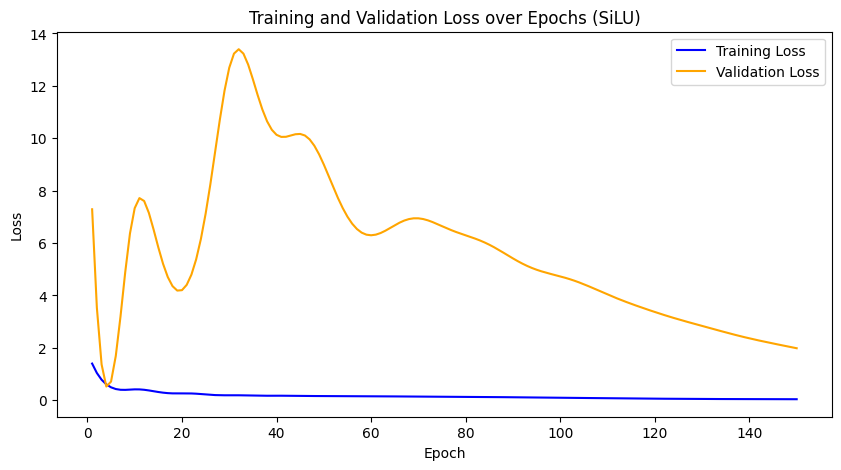

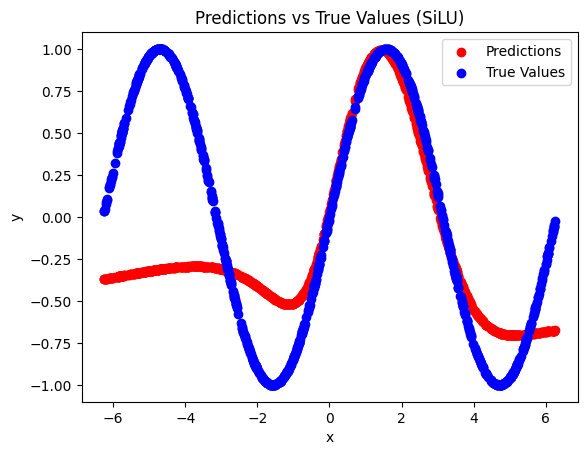

[ReLU] Epoch [50/150], Training Loss: 0.1416, Validation Loss: 14.5154
[ReLU] Epoch [100/150], Training Loss: 0.0777, Validation Loss: 13.7732
[ReLU] Epoch [150/150], Training Loss: 0.0629, Validation Loss: 8.0087


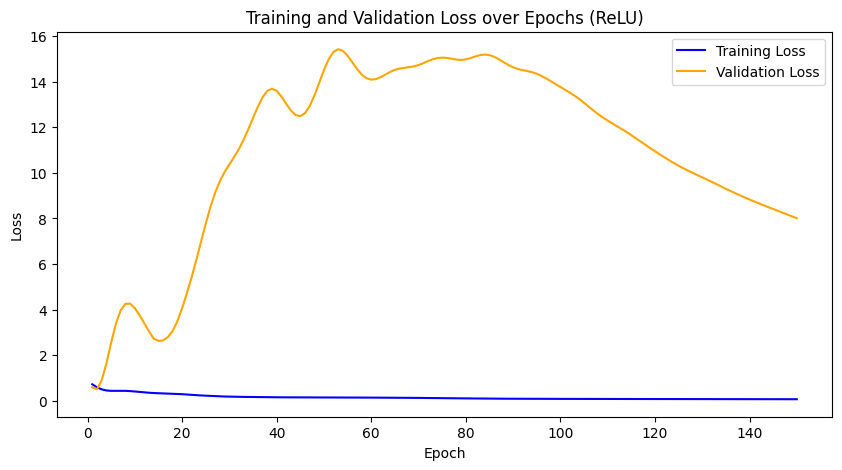

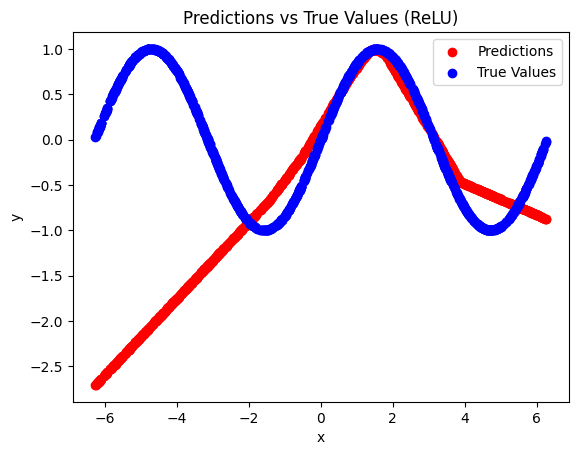

[GELU] Epoch [50/150], Training Loss: 0.1125, Validation Loss: 13.1149
[GELU] Epoch [100/150], Training Loss: 0.0773, Validation Loss: 9.8642
[GELU] Epoch [150/150], Training Loss: 0.0583, Validation Loss: 4.0335


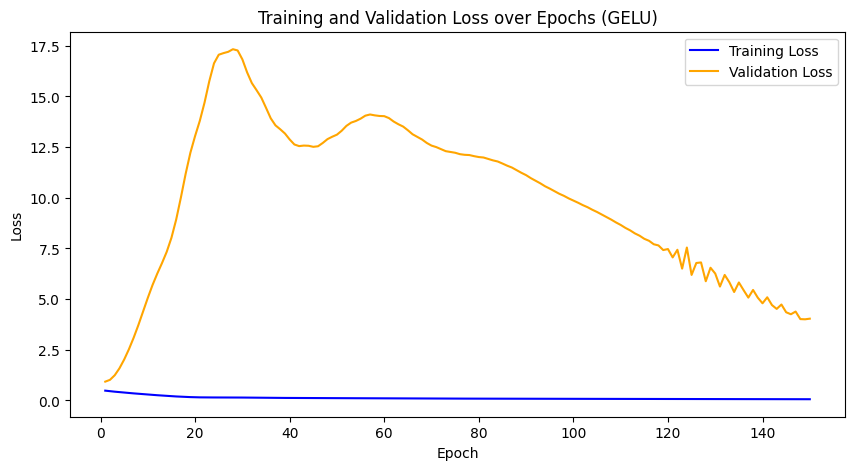

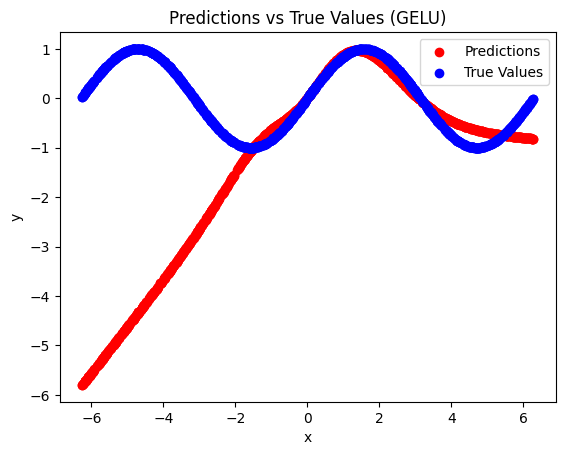

[ELU] Epoch [50/150], Training Loss: 0.1269, Validation Loss: 9.7386
[ELU] Epoch [100/150], Training Loss: 0.0592, Validation Loss: 0.8156
[ELU] Epoch [150/150], Training Loss: 0.0399, Validation Loss: 0.5683


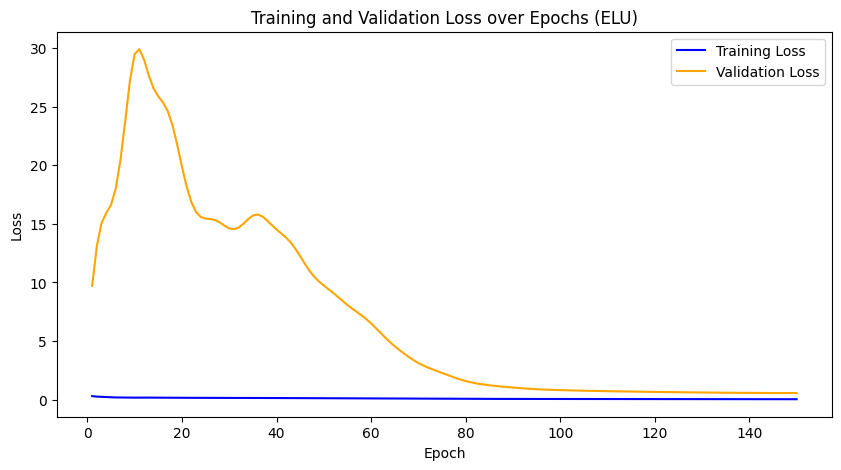

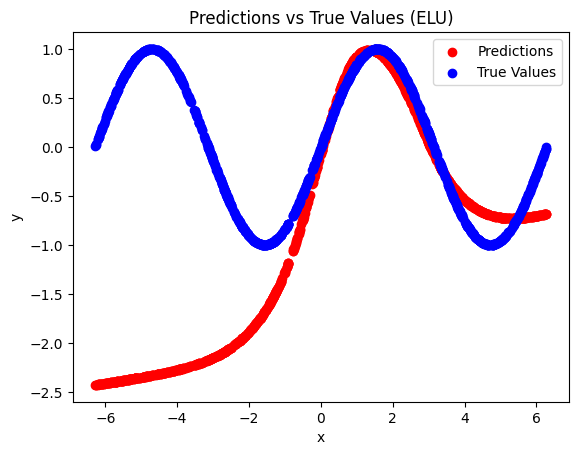

[LeakyReLU] Epoch [50/150], Training Loss: 0.1081, Validation Loss: 13.3689
[LeakyReLU] Epoch [100/150], Training Loss: 0.0648, Validation Loss: 7.3044
[LeakyReLU] Epoch [150/150], Training Loss: 0.0097, Validation Loss: 17.5824


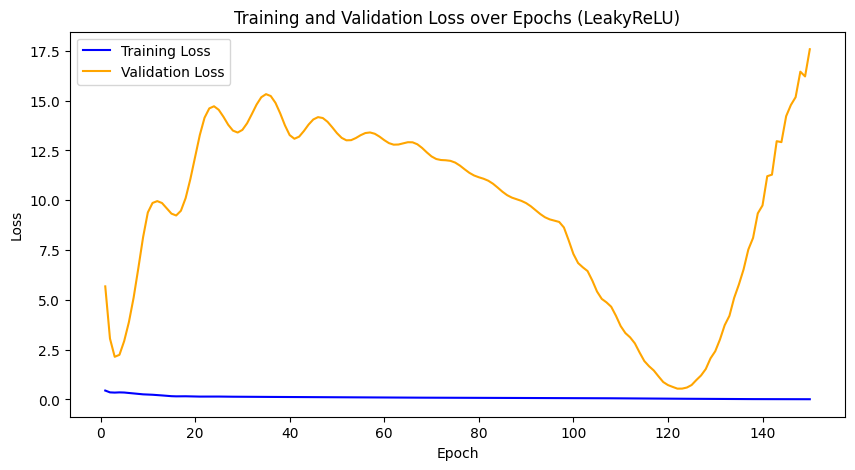

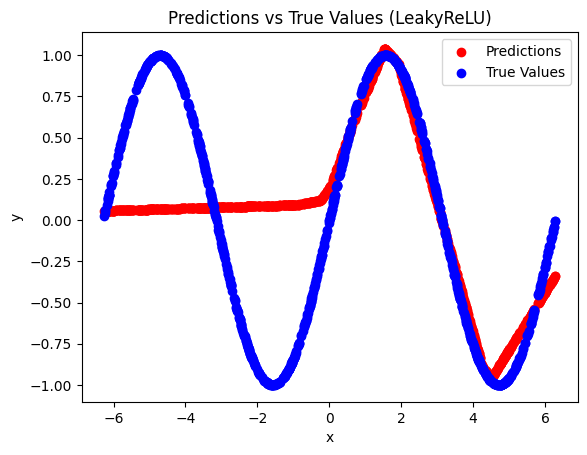

In [5]:
class Neural_Net(nn.Module):
    def __init__(self, activation_fn):
        super(Neural_Net, self).__init__()
        self.l1 = nn.Linear(1, 10, bias=True)
        self.l2 = nn.Linear(10, 10, bias=True)
        self.l3 = nn.Linear(10, 1, bias=True)
        self.activation = activation_fn
        
    def forward(self, x):
        out = self.activation(self.l1(x))
        out = self.activation(self.l2(out))
        out = self.l3(out)
        return out
    







num_epochs_1 = 150


for name, activation_fn in activation_functions.items():
    model = Neural_Net(activation_fn)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
    
    loss_values = []
    val_loss_values = []

    for epoch in range(num_epochs_1):
        
        model.train()
        outputs = model(x_t)
        loss = criterion(outputs, y_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())

        
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_v)
            val_loss = criterion(val_outputs, y_v)
            val_loss_values.append(val_loss.item())

        if (epoch + 1) % 50 == 0:
            print(f'[{name}] Epoch [{epoch + 1}/{num_epochs_1}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs_1 + 1), loss_values, label='Training Loss', color='blue')
    plt.plot(range(1, num_epochs_1 + 1), val_loss_values, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss over Epochs ({name})')
    plt.legend()
    plt.show()

  
    x_vali = np.random.uniform(-2*np.pi, 2*np.pi, 1000)
    x_vali = torch.tensor(x_vali, dtype=torch.float32).view(-1, 1)
    with torch.no_grad():
        y_pred = model(x_vali)
    plt.scatter(x_vali, y_pred.numpy(), color='red', label='Predictions')
    plt.scatter(x_vali, sin(x_vali), color='blue', label='True Values')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Predictions vs True Values ({name})')
    plt.legend()
    plt.show()


    





### Out of all the activation functions used, SiLU and ELU seem to be working the  best with validation losses of 1.9829 and 0.5683 respectively. Although ELU has a lesser validation loss than SiLU, the graph of SiLU looks much more promising than the graph generated by the model with ELU activation.